# Moore-Penrose pseudo inverse

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

Write a function computing the Moore-Penrose pseudo inverse, exploiting the full SVD.

In [2]:
def my_pinv1(A):
  U,s,VT = np.linalg.svd(A)
  s[s > 0] = 1 / s[s > 0]
  return VT.transpose() @ la.diagsvd(s, A.shape[1], A.shape[0]) @ U.transpose()

Write now a function computing the Moore-Penrose pseudo inverse, exploiting the reduced SVD.

In [3]:
def my_pinv2(A):
  U,s,VT = np.linalg.svd(A, full_matrices = False)
  s[s > 0] = 1 / s[s > 0]
  return VT.transpose() @ np.diag(s) @ U.transpose()

Generate a random matrix $A$ (with elements sampled from a standard Gaussian distribution) with 5 rows and 4 columns. Compute its Moore-Penrose pseudo inverse thorugh the two functions above defined, and compare the result with the function `numpy.linalg.pinv` (see [Documentation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html)).

In [4]:
A = np.random.randn(5,4)
Apinv0 = np.linalg.pinv(A)
Apinv1 = my_pinv1(A)
Apinv2 = my_pinv2(A)
print(np.linalg.norm(Apinv0 - Apinv1) / np.linalg.norm(Apinv0))
print(np.linalg.norm(Apinv0 - Apinv2) / np.linalg.norm(Apinv0))

1.2437648206501032e-16
1.2437648206501032e-16


Compare the three implementations performances through the Google Colab magic command `%timeit`.

In [ ]:
%timeit np.linalg.pinv(A)

In [ ]:
%timeit my_pinv1(A)

In [ ]:
%timeit my_pinv2(A)

# Least-square regression

Consider the linear model
$$
y = mx + q.
$$
where $m = 2$ and $q = 3$.

Generate $N = 100$ points $x_i$, sampling from a standard Gaussian distribution, and the associated $y_i$. Then, add a synthetic noise ($\epsilon_i$) by sampling from a Gaussian distribution with zero mean and standard deviation $\sigma = 2$. Plot the noisy data $(x_i, \tilde{y}_i)$, where $\tilde{y}_i = y_i + \epsilon_i$, in the $(x,y)$ plane, together with the line $y = mx + q$.

In [7]:
m = 2.0
q = 3.0
N = 100
noise = 2.0

X = np.random.randn(N)
Y = m*X + q + noise * np.random.randn(N)

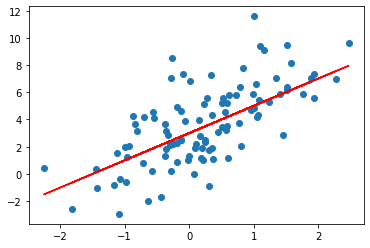

In [8]:
plt.scatter(X,Y)
plt.plot(X, m*X + q, color = 'red')

Using the previously implemented functions to compute the Moore-Penrose pseudo inverse, solve the least-squares problem
$$
\min_{m,q} \sum_{i=1}^N (\tilde{y}_i - (m x_i + q))^2
$$
and display the regression line superimposed to the noisy data and the exact model.

In [14]:
Phi = np.block([X[:,np.newaxis], np.ones((N,1))])
z = my_pinv2(Phi) @ Y
m_hat = z[0]
q_hat = z[1]
print('m_hat = %f' % m_hat)
print('q_hat = %f' % q_hat)

m_hat = 2.182822
q_hat = 3.166391


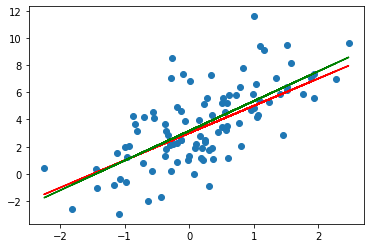

In [15]:
plt.scatter(X,Y)
plt.plot(X, m*X + q, color = 'red')
plt.plot(X, m_hat*X + q_hat, color = 'green')

Repeat the excercise by solving the normal equations. Compare the results

In [16]:
z2 = np.linalg.solve(Phi.transpose() @ Phi, Phi.transpose() @ Y)
np.linalg.norm(z - z2)

6.280369834735101e-16

# Ridge regression and Kernel regression

Consider the function
$$
y = f(x) = \tanh(2x - 1).
$$

Generate $N = 100$ points $x_i$, sampling from a standard Gaussian distribution, and the associated $y_i$. Then, add a synthetic noise ($\epsilon_i$) by sampling from a Gaussian distribution with zero mean and standard deviation $\sigma = 0.1$. Plot the noisy data $(x_i, \tilde{y}_i)$, where $\tilde{y}_i = y_i + \epsilon_i$, in the $(x,y)$ plane.

Then, generate 1000 testing points, uniformly distributed in the interval $[-3,3]$, and display the function $y = f(x)$ in correspondence of the testing points.

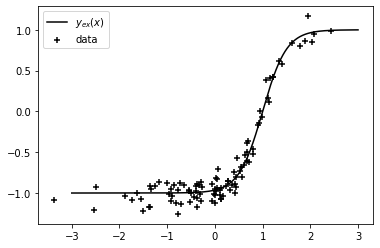

In [17]:
N = 100
noise = 0.1
y_ex = lambda x: np.tanh(2*(x - 1))

X = np.random.randn(N)
Y = y_ex(X) + noise * np.random.randn(N)

N_test = 1000
X_test = np.linspace(-3,3,N_test)
Y_test_ex = y_ex(X_test)

plt.scatter(X,Y, marker = '+', color = 'black', label = 'data')
plt.plot(X_test, Y_test_ex, color = 'black', label = '$y_{ex}(x)$')
plt.legend()

Proceeding as in the previous exercise, compute the regression line resulting from the **least squares regression** of data $(x_i, \tilde{y}_i)$. Plot the resulting regression line.

m_hat = 0.451383
q_hat = -0.649705


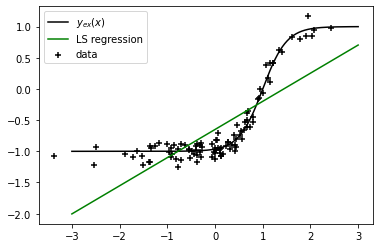

In [18]:
Phi = np.block([X[:,None], np.ones((N,1))])
z = my_pinv2(Phi) @ Y
m_hat = z[0]
q_hat = z[1]
print('m_hat = %f' % m_hat)
print('q_hat = %f' % q_hat)
Y_test_LS = m_hat*X_test + q_hat

plt.scatter(X,Y, marker = '+', color = 'black', label = 'data')
plt.plot(X_test, Y_test_ex, color = 'black', label = '$y_{ex}(x)$')
plt.plot(X_test, Y_test_LS, color = 'green', label = 'LS regression')
plt.legend()

Let us now consider **ridge regression**, corresponding to a regularizaton parameter $\lambda = 1.0$. Compare the obtained regression line with the one obtained through least squares regression.

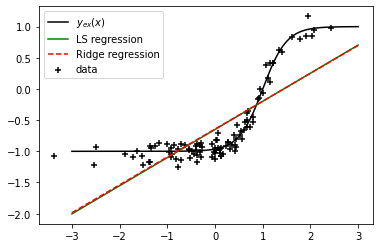

In [37]:
lam = 1.0
PhiPhiT = Phi @ Phi.transpose()
alpha = np.linalg.solve(PhiPhiT + lam*np.eye(N), Y)
w = Phi.transpose() @ alpha
Phi_test = np.block([X_test[:,None], np.ones((N_test,1))])
Y_test_RR = Phi_test @ w

plt.scatter(X,Y, marker = '+', color = 'black', label = 'data')
plt.plot(X_test, Y_test_ex, color = 'black', label = '$y_{ex}(x)$')
plt.plot(X_test, Y_test_LS, color = 'green', label = 'LS regression')
plt.plot(X_test, Y_test_RR, color = 'red', linestyle = '--', label = 'Ridge regression')
plt.legend()

Consider now **kernel regression**. 

1. Consider first the scalar product kernel 
$$K(x_i,x_j) = x_i x_j + 1.$$
Compute the regression function and compare the result with the ones obtained at the previous point. How do the results compare?

2. Consider then the higher-order scalar product kernel, for $q > 1$.
$$K(x_i,x_j) = (x_i x_j + 1)^q.$$

3. Consider finally a Gaussian kernel, for $\sigma > 0$.
$$K(x_i,x_j) = \exp\left(-\frac{(x_i - x_j)^2}{2 \sigma^2}\right).$$

(-2.0, 2.0)

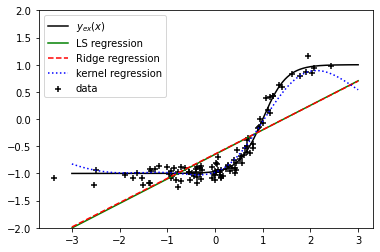

In [49]:
lam =  1.0

#def kernel(xi,xj):
#  return (xi*xj+1)**6

sigma = 1.0
def kernel(xi,xj):
  return np.exp(-np.abs(xi-xj)**2/(2*sigma**2))

K = np.array([[kernel(X[i],X[j]) for j in range(N)] for i in range(N)])
alpha = np.linalg.solve(K+lam*np.eye(N), Y)
K_test = np.array([[kernel(X_test[i],X[j]) for j in range(N)] for i in range(N_test)])
Y_test_KR = K_test @ alpha

plt.scatter(X,Y, marker = '+', color = 'black', label = 'data')
plt.plot(X_test, Y_test_ex, color = 'black', label = '$y_{ex}(x)$')
plt.plot(X_test, Y_test_LS, color = 'green', label = 'LS regression')
plt.plot(X_test, Y_test_RR, color = 'red', linestyle = '--', label = 'Ridge regression')
plt.plot(X_test, Y_test_KR, color = 'blue', linestyle = ':', label = 'kernel regression')
plt.legend()
plt.ylim([-2, 2])